In [2]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd
import math

sym.init_printing()
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

## Sistemas de primer orden

Un sistema de primer orden es aquel que en su modelo analítico en tiempo continuo, involucra por lo menos una primera derivada de la variable de interés. Los parámetros a tener en cuenta para la identificación son: Constante de tiempo($\tau$), ganancia (K).

$$G(s)=\frac{K}{\tau s + 1}$$

$\tau$: Hace referencia a la velocidad de respuesta del sistema, tanto más grande la constante de tiempo más lento responde el sistema.

## Ejemplo 1 - orden 1

Por ejemplo, si modelamos o simulamos una adquisición de datos de un sistema de primer orden así:

1. Primero se genera un valor aleatorio de ganancia $K$ y de constante de tiempo $\tau$.
2. Luego se declara la función de transferencia usando estos valores.
3. Se aplica un escalón a dicho sistema y se almacena la respuesta temporal.
4. Finalmente la respuesta del punto 3, se contamina con un ruido blanco valor medio 0 (esto con el fin de simular que los datos se midieron).

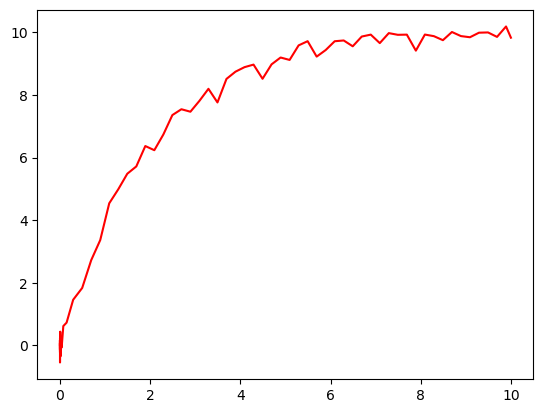

In [6]:
## Respuesta típica de un sis## Se cargan los datos que están en un archivo separado por comas.
## Se obtuvieron de una simulación en MULTISIM de un filtro paso bajos de orden 2 (como el de la tarea)
datos = pd.read_csv('data\low3.csv')

y = datos.y;
u = datos.u;

## Escala en ms
t = datos.t1*1000;
N = len(y);
t1 = np.linspace(0, t[N-1], N)

## Como es una simulación de un circuito la señal no contiene ruido, por tanto la contaminamos.
r = 0.2
e = np.random.normal(0,r,size=N)
yn = y+e
plt.plot(t,yn,color = 'red')


## Experimento de identificación

**Paso 1:** Identificar el 63.2% del valor final para poder determinar el $\tau$ del sistema. Y el tiempo de establecimiento ($t_s = 4\tau$).

Este paso es visual, en el ejemplo se usa la variable Ke, para definir VISUALMENTE el valor final y esto es susceptible a que si el ruido es muy grande, se deba aproximar mucho el valor de Ke.

In [7]:
## Determinando tao (sin conocer al función original)
tao = 0;
## Visualmente definimos el valor final
Ke = 9

## 63.2% DE ESE VALOR
V6 = 0.632*Ke;

## Compara los valores de la salida y cuando sea mayor o igual
## Al 63% del valor final, se extrae del vecto tiempo el valor temporal que corresponde a Tao

for k in range(N):
    if(yn[k]>=V6):
        tao = t[k]
        break

## Calculando el tiempo de establecimiento
ts = 4*tao
ts, tao

**Paso 2:** Determinar una aproximación mas real del valor final, para este caso es calcular el valor promedio de todas las "yn" para un tiempo mayor al de establecimiento.

In [8]:
## Calculando el valor final (Sin conocer sistema original)
Kf = 0
i2 = 0;

## A partir del tiempo de establecimiento se promedian todos los datos de la salida,
## Entendiendo que oscilan poco alrededor del valor final real.

for j in range(N):
    if(t[j]>ts):
        Kf = Kf+yn[j]
        i2 = i2+1

Kf = Kf/i2
print(Kf)                

9.877319533398936


**Paso 3:** Armar la función de transferencia estimada

In [9]:
## Armando la función de transferencia aproximada:
ge = control.tf([Kf],[tao,1])
_,ye = control.step_response(ge,t1)


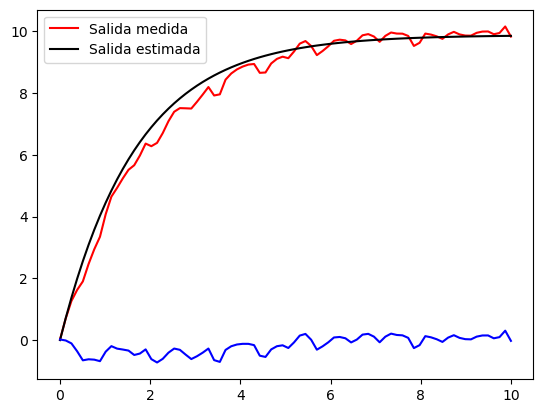

In [10]:
## Interpolando los datos con el nuevo arreglo temporal
yn_int = np.interp(t1, t, yn)
e = yn_int - ye

plt.plot(t1,yn_int,color = 'red')
plt.plot(t1,ye,color = 'black')
plt.plot(t1,e,color = 'blue')
plt.legend(['Salida medida','Salida estimada'])


In [21]:
ge

TransferFunction(array([9.84338672]), array([1.89166202, 1.        ]))